In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

import numpy as np
import jax.numpy as jnp

import seaborn as sns
sns.set_context('paper', font_scale = 1.5)
sns.color_palette('colorblind')

import h5py

In [3]:
import GC_rates

In [4]:
GC_data = GC_rates.read_data()

In [4]:
def plot_cluster_rate(zmin, zmax, dz = 0.2, z_gc = 3.5, a = 3, b = 3, sigma_dex = 0.5, Zsun = 0.02,
                     mu_rv = 1.5, sigma_rv = 1.5, beta = -2, logMstar0 = 6.26, rho_GC = 7.3e14,
                     logDelta = 5.33, logMlo = 2, logMhi = 8, plot_kwargs = {}):
    z_c = np.arange(zmin, zmax + dz, step = dz)
    R_z_c = [GC_rates.merger_rate_at_z_pop_selfconsistentfactors(
        GC_data, z, z_gc, a, b, sigma_dex, Zsun, mu_rv, sigma_rv, beta, logMstar0, rho_GC, logDelta, logMlo, logMhi) for z in z_c]
    
    plt.plot(z_c, R_z_c, **plot_kwargs)
    plt.xlabel(r'redshift $z$')
    plt.xlim(zmin, zmax)
    plt.ylabel(r'$\mathcal{R}(z)$')
    plt.yscale('log')

In [5]:
with h5py.File('GW_dynrate_z0_z1.h5', 'r') as inp:
    GW_R0_post = np.array(inp['dyn_rate_z0'])
    GW_R1_post = np.array(inp['dyn_rate_z1'])
    
with h5py.File('GW_dynrate_versus_z.h5', 'r') as inp:
    dyn_rate = np.array(inp['dyn_rate'])
    z_plot = np.array(inp['z'])
    total_rate = np.array(inp['total_rate'])

In [7]:
GC_rates.compute_missing_cluster_factor(beta = -2, logMstar0 = 6.3, logMlo = 2, logMhi = 8)

DeviceArray(0.00126287, dtype=float32)

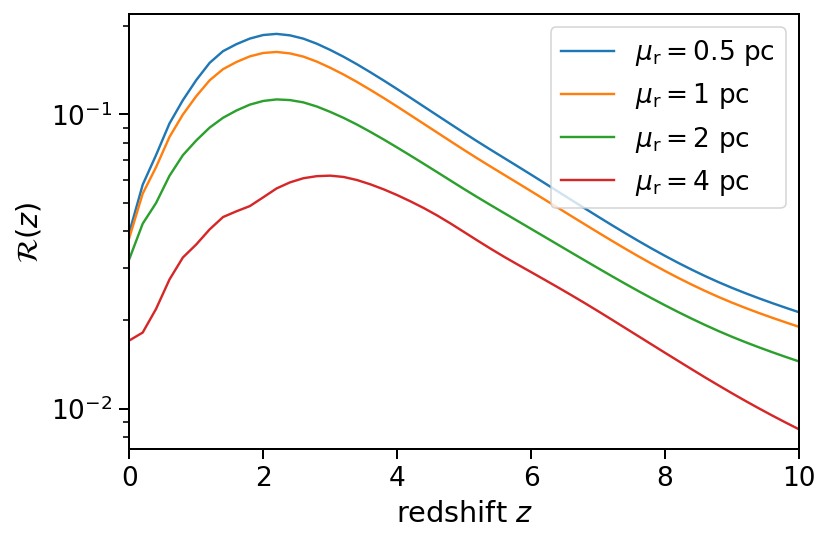

In [12]:
plot_cluster_rate(0, 10, mu_rv = 0.5, sigma_rv = 1, plot_kwargs = dict(label = r'$\mu_\mathrm{r} = 0.5$ pc'))

plot_cluster_rate(0, 10, mu_rv = 1, sigma_rv = 1, plot_kwargs = dict(label = r'$\mu_\mathrm{r} = 1$ pc'))

plot_cluster_rate(0, 10, mu_rv = 2, sigma_rv = 1, plot_kwargs = dict(label = r'$\mu_\mathrm{r} = 2$ pc'))

plot_cluster_rate(0, 10, mu_rv = 4, sigma_rv = 1, plot_kwargs = dict(label = r'$\mu_\mathrm{r} = 4$ pc'))


plt.legend(loc = 'best')

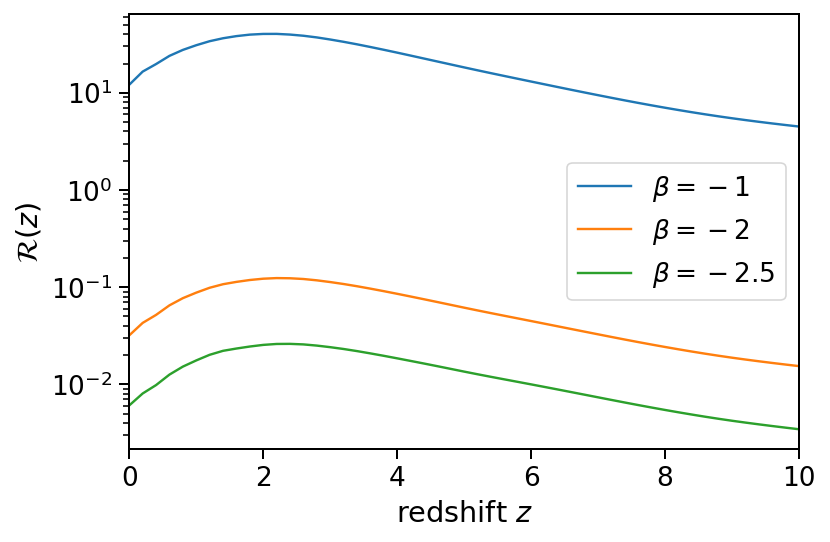

In [14]:
plot_cluster_rate(0, 10, beta = -1, plot_kwargs = dict(label = r'$\beta = -1$'))
plot_cluster_rate(0, 10, beta = -2, plot_kwargs = dict(label = r'$\beta = -2$'))
plot_cluster_rate(0, 10, beta = -2.5, plot_kwargs = dict(label = r'$\beta = -2.5$'))

plt.legend(loc = 'best')

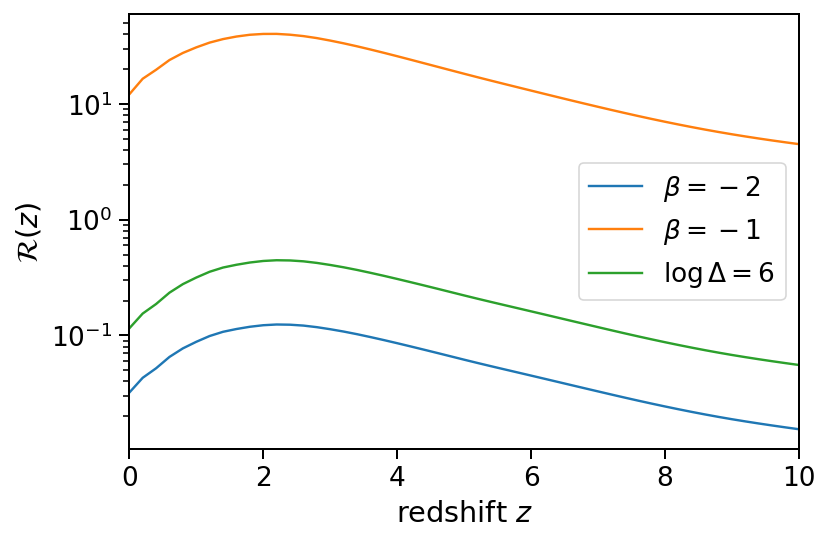

In [18]:
plot_cluster_rate(0, 10, beta = -2, plot_kwargs = dict(label = r'$\beta = -2$'))
plot_cluster_rate(0, 10, beta = -1, plot_kwargs = dict(label = r'$\beta = -1$'))


plot_cluster_rate(0, 10, beta = -2, logDelta = 6, plot_kwargs = dict(label = r'$\log\Delta = 6$'))

plt.legend(loc = 'best')


In [20]:
beta=-2


dNdV0 = GC_rates.cluster_number_density_from_mass_density(beta = beta)
    
f_missing_cluster = GC_rates.compute_missing_cluster_factor(beta = beta)
    
f_disrupted_cluster = GC_rates.compute_disrupted_cluster_factor(beta = beta)

dNdV0, f_missing_cluster, f_disrupted_cluster, f_missing_cluster * f_disrupted_cluster

(DeviceArray(3.2575532e+09, dtype=float32),
 DeviceArray(0.00121255, dtype=float32),
 DeviceArray(3.5659533, dtype=float32),
 DeviceArray(0.0043239, dtype=float32))

In [21]:
beta=-1


dNdV0 = GC_rates.cluster_number_density_from_mass_density(beta = beta)
    
f_missing_cluster = GC_rates.compute_missing_cluster_factor(beta = beta)
    
f_disrupted_cluster = GC_rates.compute_disrupted_cluster_factor(beta = beta)

dNdV0, f_missing_cluster, f_disrupted_cluster, f_missing_cluster * f_disrupted_cluster

(DeviceArray(1.6422648e+09, dtype=float32),
 DeviceArray(0.8447029, dtype=float32),
 DeviceArray(1.5881805, dtype=float32),
 DeviceArray(1.3415407, dtype=float32))

In [23]:
logDelta = 6
logMstar0 = 6.26

dNdV0 = GC_rates.cluster_number_density_from_mass_density(logMstar0 = logMstar0, logDelta = logDelta)
    
f_missing_cluster = GC_rates.compute_missing_cluster_factor(logMstar0 = logMstar0)
    
f_disrupted_cluster = GC_rates.compute_disrupted_cluster_factor(logMstar0 = logMstar0, logDelta = logDelta)

dNdV0, f_missing_cluster, f_disrupted_cluster, f_missing_cluster * f_disrupted_cluster

(DeviceArray(1.6214346e+09, dtype=float32),
 DeviceArray(0.00121255, dtype=float32),
 DeviceArray(25.7431, dtype=float32),
 DeviceArray(0.03121482, dtype=float32))

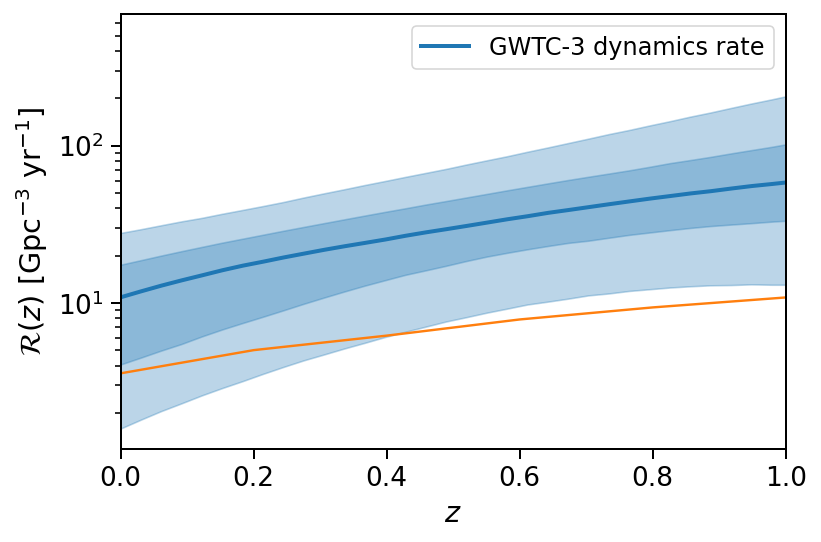

In [48]:
plt.plot(z_plot, np.percentile(dyn_rate, 50, axis = 0), label = 'GWTC-3 dynamics rate', linewidth = 2.0)
plt.fill_between(z_plot, np.percentile(dyn_rate, 5, axis = 0), np.percentile(dyn_rate, 95, axis = 0), alpha = 0.3, color = sns.color_palette()[0])
plt.fill_between(z_plot, np.percentile(dyn_rate, 25, axis = 0), np.percentile(dyn_rate, 75, axis = 0), alpha = 0.3, color = sns.color_palette()[0])




plot_cluster_rate(0, 1, beta = -2, mu_rv = 0.5, logMlo = 4)




plt.yscale('log')
plt.xlim(min(z_plot), 1)

plt.xlabel(r'$z$')
plt.ylabel(r'$\mathcal{R}(z)$ [Gpc$^{-3}$ yr$^{-1}$]')
plt.legend(loc = 'best', fontsize = 12)

plt.tight_layout()

In [4]:
def plot_cluster_rate(zmin, zmax, dz = 0.2, z_gc = 4, a = 3, b = 5, sigma_dex = 0.5, Zsun = 0.02,
                     mu_rv = 1.5, sigma_rv = 1.5, beta = -2, logMstar0 = 6.3, dNdV0 = 2.31e9,
                     logf_disrupted_cluster = 0, logMlo = 2, logMhi = 8, plot_formation = False, plot_form_kwargs = {}, plot_kwargs = {}):
    z_c = np.arange(zmin, zmax + dz, step = dz)
    R_z_c = [GC_rates.merger_rate_at_z_pop(
        GC_data, z, z_gc, a, b, dNdV0, logf_disrupted_cluster, sigma_dex, Zsun, mu_rv, sigma_rv, 
        beta, logMstar0, logMlo, logMhi) for z in z_c]
        
    plt.plot(z_c, R_z_c, **plot_kwargs)
    
    if plot_formation:
        R_z_form = [GC_rates.sfr_at_z(zi, dNdV0, z_gc, a, b, 10**logf_disrupted_cluster) for zi in z_c]
        plt.plot(z_c, 100 * np.array(R_z_form), **plot_form_kwargs)
        
    plt.xlabel(r'redshift $z$')
    plt.xlim(zmin, zmax)
    plt.ylabel(r'$\mathcal{R}(z)$ [Gpc$^{-3}$ yr$^{-1}$]')
    plt.yscale('log')

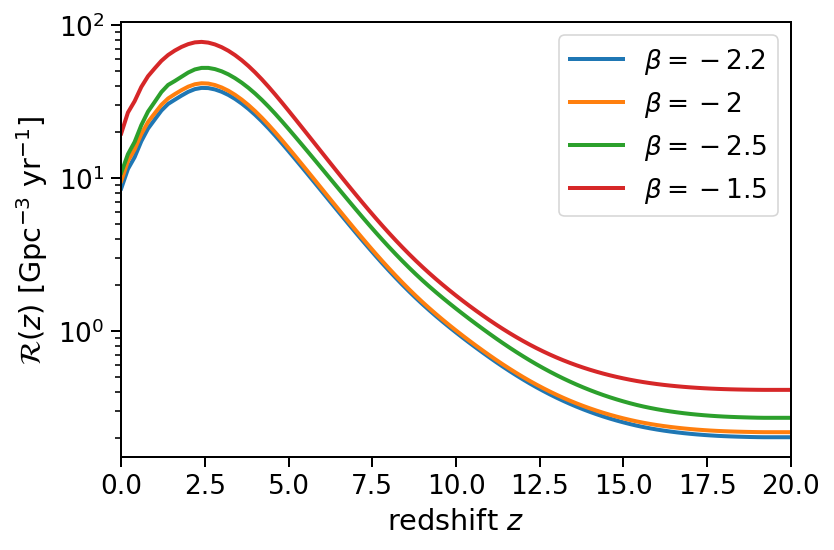

In [5]:
plot_cluster_rate(0, 20, beta = -2.2, plot_kwargs = dict(label = r'$\beta = -2.2$', color = sns.color_palette()[0], linewidth = 2))
plot_cluster_rate(0, 20, beta = -2, plot_kwargs = dict(label = r'$\beta = -2$', color = sns.color_palette()[1], linewidth = 2))
plot_cluster_rate(0, 20, beta = -2.5, plot_kwargs = dict(label = r'$\beta = -2.5$', color = sns.color_palette()[2], linewidth = 2))
plot_cluster_rate(0, 20, beta = -1.5, plot_kwargs = dict(label = r'$\beta = -1.5$', color = sns.color_palette()[3], linewidth = 2))



plt.legend(loc = 'best')



In [31]:
GC_rates.compute_missing_cluster_factor(beta = -2, logMstar0 = 6.3, logMlo = 4, res = 20)

DeviceArray(0.13873342, dtype=float32)

In [32]:
GC_rates.compute_missing_cluster_factor(beta = -2, logMstar0 = 6.3, logMlo = 4, res = 100)

DeviceArray(0.1669431, dtype=float32)

In [29]:
GC_rates.compute_missing_cluster_factor(beta = -3, logMstar0 = 6.3, logMlo = 5, res = 1000)

DeviceArray(1.2478687, dtype=float32)

In [30]:
GC_rates.compute_missing_cluster_factor(beta = -3, logMstar0 = 6.3, logMlo = 5, res = 10000)

DeviceArray(1.25346, dtype=float32)

In [47]:
def inv_cumpowerlaw(u, mmin, mmax, alpha):
     return (u*(mmax**(alpha+1) - mmin**(alpha+1)) + mmin**(alpha+1))**(1.0/(alpha+1))
    
ms2 = inv_cumpowerlaw(np.random.rand(10000000), 10**4, 10**8, -2)
mss = inv_cumpowerlaw(np.random.rand(10000), 0.6*2e5, 0.6*1e6, -2)

np.mean(mss**1.6)/np.mean(ms2**1.6)

0.42352973308594044